<a href="https://colab.research.google.com/github/taichan03/MAGIC-Gamma-Telescope_ML/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [60]:
cols = ["fLength","fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long","fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [61]:
df["class"] = (df["class"] == "g").astype(int)

In [62]:
df.head()

,fLength,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


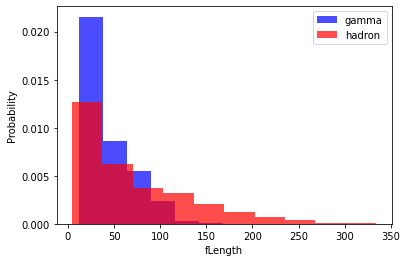

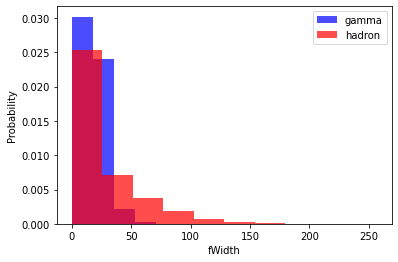

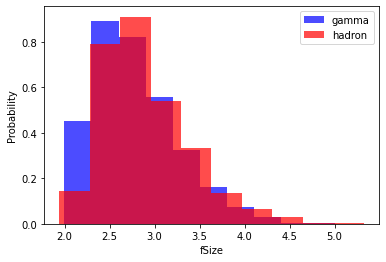

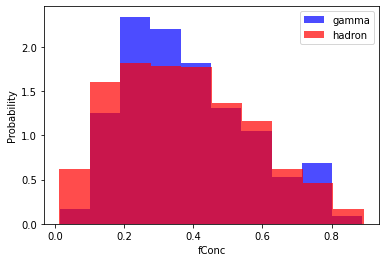

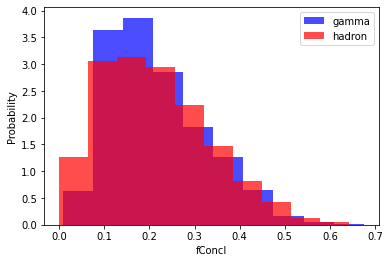

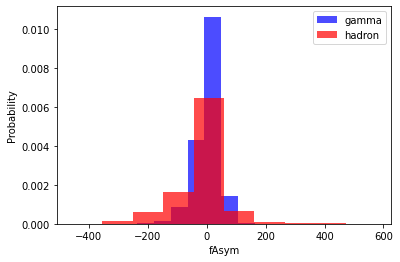

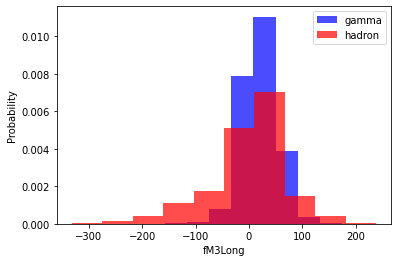

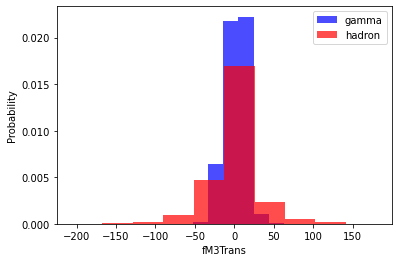

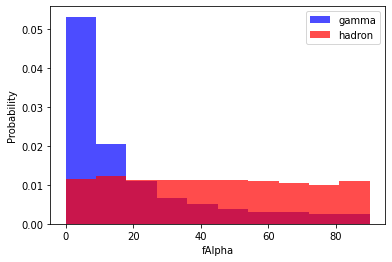

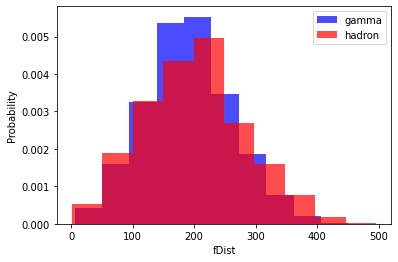

In [63]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

#Train, validation, test datasets


In [70]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [65]:
#this scale the data because some of the features have small or large numbers
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

#this takes all the values and scales it
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
#takes a sample that is smaller and reuse it so that they match
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)
#instead of stacking the data on top of each other it will stack them next to each other
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [71]:
print(len(train[train["class"]==1])) #gammas
print(len(train[train["class"]==0]))
#there are too many gammas
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

7395
4017


In [67]:
len(y_train)

14920

In [68]:
sum(y_train == 1)

7460

In [69]:
sum(y_train == 0)

7460

kNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [74]:
#set and fit the model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [75]:
#this uses the fit model and make predictions
y_pred = knn_model.predict(X_test)

In [76]:
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [77]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1357
           1       0.83      0.88      0.86      2447

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.81      0.80      3804

